In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("cr_loan2.csv")

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Charger les données
data = pd.read_csv("cr_loan_w2 (1).csv")

# Prétraitement (par exemple, sélectionner les colonnes pertinentes)
X = data.drop('loan_status', axis=1)  # Remplacer 'loan_status' par la colonne cible réelle
y = data['loan_status']

# Séparer les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle de régression logistique
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Entraîner le modèle d'arbre boosté par gradient
gbt_model = GradientBoostingClassifier()
gbt_model.fit(X_train, y_train)

# Faire des prédictions avec les deux modèles
preds_lr = lr_model.predict(X_test_scaled)
preds_gbt = gbt_model.predict(X_test)

# Stocker les prédictions dans des DataFrames
preds_df_lr = pd.DataFrame({'loan_status': preds_lr})
preds_df_gbt = pd.DataFrame({'loan_status': preds_gbt})

# Afficher les rapports de classification
print("Rapport de classification - Régression logistique :")
print(classification_report(y_test, preds_df_lr['loan_status'], target_names=['Non-Défaut', 'Défaut']))

print("Rapport de classification - Arbre boosté par gradient :")
print(classification_report(y_test, preds_df_gbt['loan_status'], target_names=['Non-Défaut', 'Défaut']))

# Afficher les scores F1 pour chaque modèle
print("F1 Score - Régression logistique :")
print(precision_recall_fscore_support(y_test, preds_df_lr['loan_status'], average='macro')[2])

print("F1 Score - Arbre boosté par gradient :")
print(precision_recall_fscore_support(y_test, preds_df_gbt['loan_status'], average='macro')[2])


Rapport de classification - Régression logistique :
              precision    recall  f1-score   support

  Non-Défaut       0.89      0.96      0.92      4591
      Défaut       0.79      0.57      0.66      1301

    accuracy                           0.87      5892
   macro avg       0.84      0.76      0.79      5892
weighted avg       0.87      0.87      0.86      5892

Rapport de classification - Arbre boosté par gradient :
              precision    recall  f1-score   support

  Non-Défaut       0.92      0.99      0.96      4591
      Défaut       0.96      0.70      0.81      1301

    accuracy                           0.93      5892
   macro avg       0.94      0.85      0.88      5892
weighted avg       0.93      0.93      0.92      5892

F1 Score - Régression logistique :
0.79182989256709
F1 Score - Arbre boosté par gradient :
0.8845614240017461


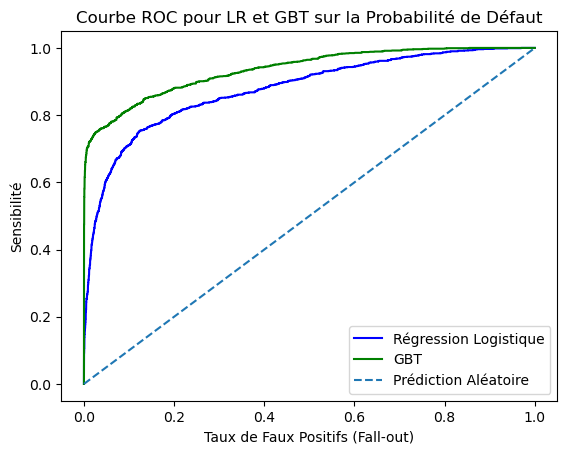

In [5]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Prédictions de probabilités pour la régression logistique
clf_logistic_preds = lr_model.predict_proba(X_test_scaled)[:, 1]  # Probabilité pour la classe 'défaut'

# Prédictions de probabilités pour l'arbre boosté par gradient
clf_gbt_preds = gbt_model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe 'défaut'

# Composants de la courbe ROC
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, clf_logistic_preds)
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, clf_gbt_preds)

# Courbe ROC avec les deux modèles
plt.plot(fallout_lr, sensitivity_lr, color='blue', label='%s' % 'Régression Logistique')
plt.plot(fallout_gbt, sensitivity_gbt, color='green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Prédiction Aléatoire')
plt.title("Courbe ROC pour LR et GBT sur la Probabilité de Défaut")
plt.xlabel('Taux de Faux Positifs (Fall-out)')
plt.ylabel('Sensibilité')
plt.legend()
plt.show()


In [6]:
# Imprimer le score AUC de la régression logistique avec formatage
print("Score AUC de la Régression Logistique : %0.2f" % roc_auc_score(y_test, clf_logistic_preds))

# Imprimer le score AUC de l'arbre boosté par gradient avec formatage
print("Score AUC de l'Arbre Boosté par Gradient : %0.2f" % roc_auc_score(y_test, clf_gbt_preds))


Score AUC de la Régression Logistique : 0.88
Score AUC de l'Arbre Boosté par Gradient : 0.94


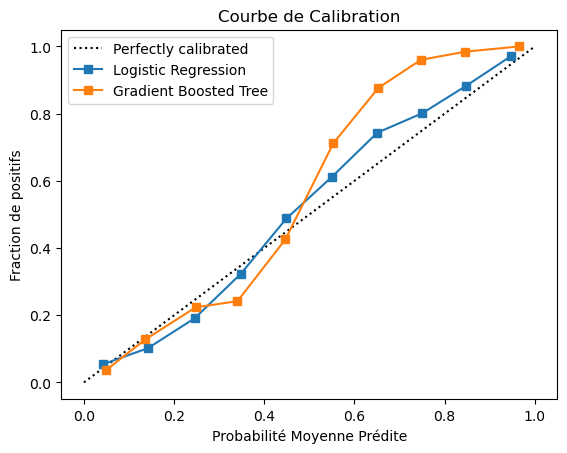

In [8]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Charger et préparer les données (remplace par tes propres données)
# data = pd.read_csv("cr_loan_w2 (1).csv")
X = data.drop('loan_status', axis=1)  # Remplacer par la colonne cible réelle
y = data['loan_status']

# Diviser les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement des modèles
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

gbt_model = GradientBoostingClassifier()
gbt_model.fit(X_train, y_train)

# Prédictions des probabilités pour les deux modèles
clf_logistic_preds = lr_model.predict_proba(X_test_scaled)[:, 1]  # Probabilité de défaut
clf_gbt_preds = gbt_model.predict_proba(X_test)[:, 1]  # Probabilité de défaut

# Calcul des courbes de calibration pour les deux modèles
frac_of_pos_lr, mean_pred_val_lr = calibration_curve(y_test, clf_logistic_preds, n_bins=10)
frac_of_pos_gbt, mean_pred_val_gbt = calibration_curve(y_test, clf_gbt_preds, n_bins=10)

# Tracer les courbes de calibration
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    

# Courbe de calibration pour la régression logistique
plt.plot(mean_pred_val_lr, frac_of_pos_lr, 
         's-', label='%s' % 'Logistic Regression')

# Courbe de calibration pour l'arbre boosté par gradient
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt, 
         's-', label='%s' % 'Gradient Boosted Tree')

# Ajouter les étiquettes et la légende
plt.ylabel('Fraction de positifs')
plt.xlabel('Probabilité Moyenne Prédite')
plt.legend()
plt.title('Courbe de Calibration')
plt.show()
